<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: Decision Tree #



##Inicialización##

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [2]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

fatal: destination path 'fiumark' already exists and is not an empty directory.
/content/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


In [3]:
pd.options.display.max_columns = None
df = pp.get_dataset()

##Modelo 1##

###Pre procesamiento###

In [4]:
df = pp.get_dataset()
df1 = pp.common_preprocessing(df)
X_train1, X_test1, y_train1, y_test1 = pp.get_train_test_data(df1)

###Entrenamiento###

In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(2, 20),
    'criterion': ["gini", "entropy"]
}

clf = DecisionTreeClassifier(random_state=42)

gscv1 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train1)

In [6]:
print(f"Best score: {gscv1.best_score_}")
print(f"Best params {gscv1.best_params_}")

Best score: 0.8311719893653663
Best params {'criterion': 'gini', 'max_depth': 3}


##Modelo 2##

###Pre procesamiento###

In [7]:
df = pp.get_dataset()
df2 = pp.min_features_preprocessing(df)
X_train2, X_test2, y_train2, y_test2 = pp.get_train_test_data(df2)

###Entrenamiento###

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(2, 20),
    'criterion': ["gini", "entropy"]
}

clf = DecisionTreeClassifier(random_state=42)

gscv2 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train2)

In [9]:
print(f"Best score: {gscv2.best_score_}")
print(f"Best params {gscv2.best_params_}")

Best score: 0.8299484750387498
Best params {'criterion': 'entropy', 'max_depth': 3}


##Evaluación del modelo##

In [10]:
df = pp.get_dataset()
y_pred = gscv1.predict(X_test1)

###Precisión recall y F1-score##

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        95
           1       0.70      0.77      0.73        66

    accuracy                           0.77       161
   macro avg       0.76      0.77      0.77       161
weighted avg       0.78      0.77      0.77       161



###Accuracy###

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.7701863354037267

###Auc-Roc###

In [13]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test1, y_pred)
auc_roc

0.7705741626794258

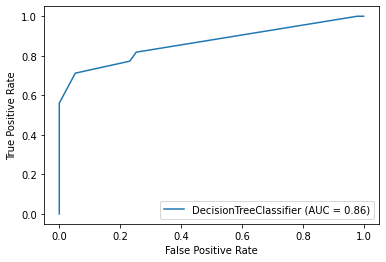

In [18]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv1.best_estimator_, X_test1, y_test1)  
plt.show()

###Matriz de confusión###

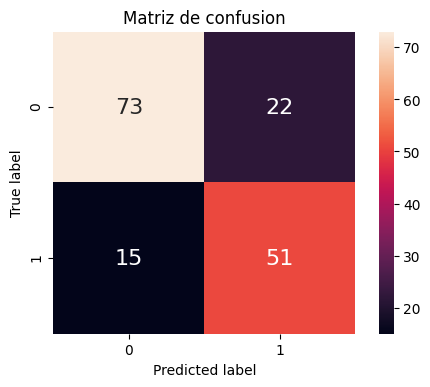

In [19]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test1, y_pred)

##Predicción##

In [20]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X_holdout = pp.common_preprocessing(X_holdout)
df2 = pd.DataFrame(gscv1.predict(X_holdout),columns=['volveria'])
df3 = pd.concat([X_holdout.id_usuario,df2],axis=1)
df3.to_csv('decisiontree.csv')
df3

,id_usuario,volveria
0,650,1
1,234,0
2,31,1
3,552,1
4,411,0
...,...,...
85,354,1
86,82,0
87,172,1
88,8,1
